# Agregando outros meios de transporte

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade pandas

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [ ]:
# Mapa
rj = gpd.read_file('/content/drive/MyDrive/Programacao/GeoPandas/Mapas/RJ/33MUE250GC_SIR.shp')
rj = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']

# Dados Imóveis
df_dados_imoveis = pd.read_table('/content/drive/MyDrive/Programacao/GeoPandas/Dados/dados.txt')
geometry = [Point(localizacao) for localizacao in zip(df_dados_imoveis.Longitude, df_dados_imoveis.Latitude)] # lista de Points com as localizações
crs = {'proj' : 'latlong',
       'ellps': 'WGS84',
       'datum' : 'WGS84',
       'no_defs' : True}
gdf_dados_imoveis = gpd.GeoDataFrame(df_dados_imoveis, crs = crs, geometry = geometry)

# Dados Metrô
metro = gpd.read_file('/content/drive/MyDrive/Programacao/GeoPandas/Dados/Estacoes_Metro.geojson')

# set do crs
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
gdf_dados_imoveis = gdf_dados_imoveis.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Imoveis dentro da cidade
esta_dentro = gdf_dados_imoveis['geometry'].within(rj.iloc[0].geometry)
gdf_dados_imoveis = gdf_dados_imoveis[esta_dentro]

# Distância para a estação de metrô
gdf_dados_imoveis['Dist_Metro'] = gdf_dados_imoveis['geometry'].apply(lambda x: metro.distance(x).min())

In [30]:
# Dados Trem
trem = gpd.read_file('/content/drive/MyDrive/Programacao/GeoPandas/Dados/Estacoes_Trem.geojson')
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
esta_dentro = trem['geometry'].within(rj.iloc[0].geometry) # Seleciona apenas as estações dentro do município
trem = trem[esta_dentro]

# Dados BRT
brt = gpd.read_file('/content/drive/MyDrive/Programacao/GeoPandas/Dados/Estacoes_BRT.geojson')
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Distancia do imóvel até a estação de trem e BRT
gdf_dados_imoveis['Dist_Trem'] = gdf_dados_imoveis['geometry'].apply(lambda x: trem.distance(x).min())
gdf_dados_imoveis['Dist_BRT'] = gdf_dados_imoveis['geometry'].apply(lambda x: brt.distance(x).min())

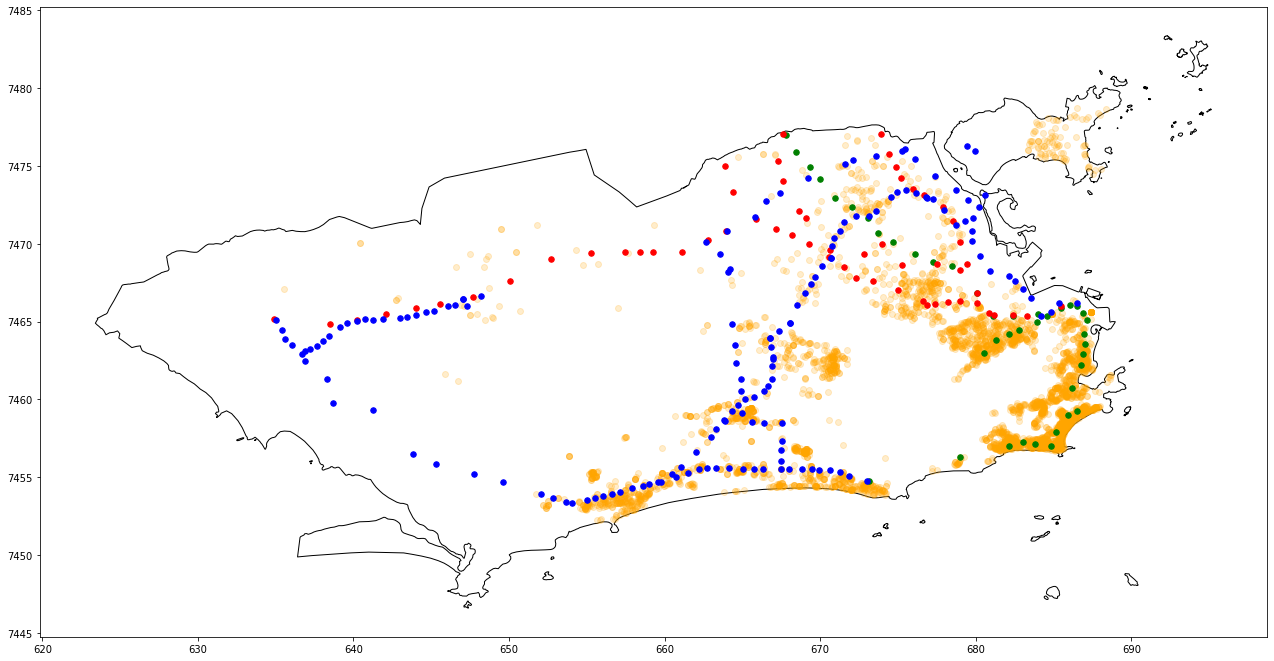

In [ ]:
# Plot
base = rj.plot(color='white', edgecolor='black', figsize=(22,22))
gdf_dados_imoveis.plot(ax=base, color='orange', figsize=(22,22), alpha=0.2)
metro.plot(ax=base, color='green', figsize=(22,22), markersize=30)
trem.plot(ax=base, color='red', figsize=(22,22), markersize=30)
brt.plot(ax=base, color='blue', figsize=(22,22), markersize=30)

## Distância até a qualquer estação mais próxima

GeoSeries com todos os meios de transporte para calcular a distância do imóvel para a estação mais próxima.

In [ ]:
# Concatenação das geometry dos meios de transporte em uma GeoSeries
transporte = pd.concat([metro.geometry, trem.geometry, brt.geometry], ignore_index=True)
transporte.head()

0    POINT (667.827 7476.959)
1    POINT (668.471 7475.883)
2    POINT (669.365 7474.959)
3    POINT (670.012 7474.182)
4    POINT (670.963 7472.930)
dtype: geometry

In [31]:
gdf_dados_imoveis['Dist_Transporte'] = gdf_dados_imoveis['geometry'].apply(lambda x: transporte.distance(x).min())
gdf_dados_imoveis.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Metro,Dist_Transporte,Dist_Trem,Dist_BRT
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939,0.443193,15.627477,0.443193
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741,3.642787,6.266952,3.642787
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973,0.641470,0.641470,2.657083
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039,0.422370,12.303554,0.422370
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159,0.214605,15.241645,0.214605


Continua na Parte 5.